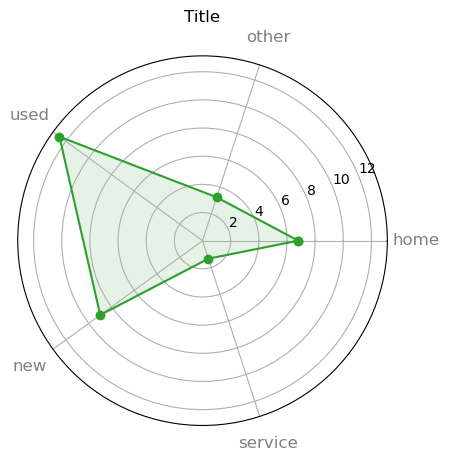

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.DataFrame({'Col A': ['home', 'other', 'used', 'new', 'service'],
                   'Col B': [6.797, 3.243, 12.567, 8.985, 1.345]})
fig = plt.figure()
ax = fig.add_subplot(111, projection="polar")

# theta has 5 different angles, and the first one repeated
theta = np.arange(len(df) + 1) / float(len(df)) * 2 * np.pi
# values has the 5 values from 'Col B', with the first element repeated
values = df['Col B'].values
values = np.append(values, values[0])

# draw the polygon and the mark the points for each angle/value combination
l1, = ax.plot(theta, values, color="C2", marker="o", label="Name of Col B")
plt.xticks(theta[:-1], df['Col A'], color='grey', size=12)
ax.tick_params(pad=10) # to increase the distance of the labels to the plot
# fill the area of the polygon with green and some transparency
ax.fill(theta, values, 'green', alpha=0.1)

# plt.legend() # shows the legend, using the label of the line plot (useful when there is more than 1 polygon)
plt.title("Title")
plt.show()

In [42]:
df = pd.read_csv("../data/polluter/2023_with_co2.csv")

# select the line corresponding to alexander zverev, and draw radar plot
df = df[df['name'] == 'Dominic Thiem']
# df = df[df['name'] == 'Alexander Zverev']


In [43]:
df

,player,co2,km,tournaments,rank,name,ioc,flag,matches
97,106233,19.427472,68166.566727,22.0,98,Dominic Thiem,AUT,🇦🇹,43


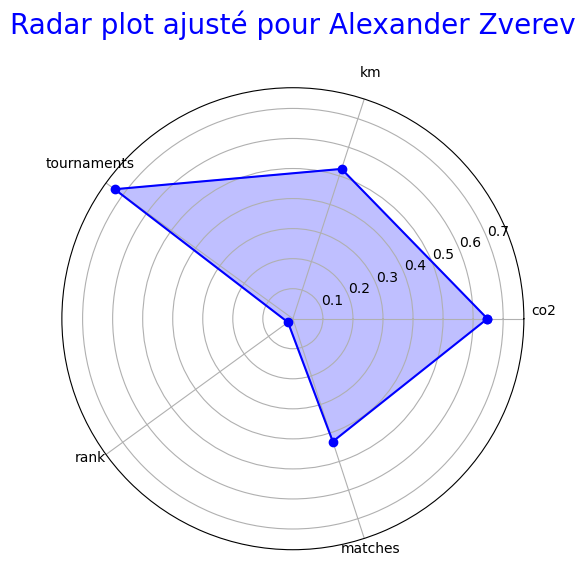

In [44]:
player_data = df
player_normalized = {
    'co2': player_data['co2'] / 30,
    'km': player_data['km'] / 130000,
    'tournaments': player_data['tournaments'] / 30,
    'rank': (100 - player_data['rank']) / (100 - 1),  # Supposons que le meilleur classement possible soit 1 et le pire 10 pour l'exemple
    'matches': player_data['matches'] / 100
}

categories = list(player_normalized.keys())
values = list(player_normalized.values())
values += values[:1]  # on ferme le cercle

angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
angles += angles[:1]  # pour fermer le cercle

# Création du diagramme radar
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
ax.fill(angles, values, color='blue', alpha=0.25)
ax.plot(angles, values, color='blue', marker='o')

# Définir les étiquettes des catégories avec les plages de données
labels = [f"{cat}\n" for cat, _ in zip(categories, [50, 200000, 30, 10, 100])]
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)

# Ajouter un titre
ax.set_title('Radar plot ajusté pour Alexander Zverev', size=20, color='blue', y=1.1)

# Afficher le graphique
plt.show()

In [1]:
import pandas as pd
df = pd.read_csv("../data/polluter/2023_with_co2.csv")

df

,player,co2,km,tournaments,rank,name,ioc,flag,matches
0,104925,11.083552,38889.655539,12.0,1,Novak Djokovic,SRB,🇷🇸,63
1,207989,17.075465,59913.912337,17.0,2,Carlos Alcaraz,ESP,🇪🇸,77
2,106421,24.335591,85388.038467,22.0,3,Daniil Medvedev,RUS,🇷🇺,85
3,206173,22.031784,77304.505528,22.0,4,Jannik Sinner,ITA,🇮🇹,84
4,126094,25.205950,88441.930886,25.0,5,Andrey Rublev,RUS,🇷🇺,81
...,...,...,...,...,...,...,...,...,...
95,126239,24.363015,85484.264562,22.0,96,Arthur Rinderknech,FRA,🇫🇷,35
96,210506,6.093689,21381.364747,6.0,97,Alex Michelsen,USA,🇺🇸,15
97,106233,19.427472,68166.566727,22.0,98,Dominic Thiem,AUT,🇦🇹,43
98,133297,16.674607,58507.392825,11.0,99,Yosuke Watanuki,JPN,🇯🇵,19


In [7]:
# Save JSON under format 
# {     
# "Alexander Zverev": [
#      "co2": 0.1,
#      "km": 0.2,
#      "tournaments": 27,
#      "rank": 4,
#      "matches": 63,
#   ]
# }
data = {}
for index, row in df.iterrows():
    data[row['name']] = {
        "co2": row['co2'] / 30,
        "km": row['km'] / 130000,
        "tournaments": row['tournaments'] / 30,
        "rank": (100 - row['rank']) / (100 - 1),  # Supposons que le meilleur classement possible soit 1 et le pire 10 pour l'exemple
        "matches": row['matches'] / 100
    }

import json
with open('data.json', 'w') as f:
    json.dump(data, f, indent=4)